In [1]:
!pip install BERTopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [42]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [9]:
import json
file_path = 'controversial_users_comments.json'
with open(file_path, 'r') as f:
      data = json.load(f)

In [10]:
# Extract 'text' values from dictionaries in 'data', ensuring the key exists
comments = [doc.get('text') for doc in data if 'text' in doc]

In [11]:
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = 	BERTopic.load("Israel_Hamas_ControversialComments_model", embedding_model=embedding_model)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
topic_model.find_topics("israel")

([278, 642, 804, 365, 150],
 [0.89351547, 0.72894585, 0.71490854, 0.7145917, 0.70142937])

In [30]:
topics = topic_model.get_topics()
topics_words = {}

for topic_num, words in topics.items():
    words = [word.lower() for word, prob in words]
    for word in words:
        if word in topics_words:
            topics_words[word] += 1
        else:
            topics_words[word] = 1

In [31]:
topics_words = dict(sorted(topics_words.items(), key=lambda x: x[1], reverse=True))
topics_words = {word:count for word, count in topics_words.items() if word!=''}

In [39]:
# top N words
top_n = 50

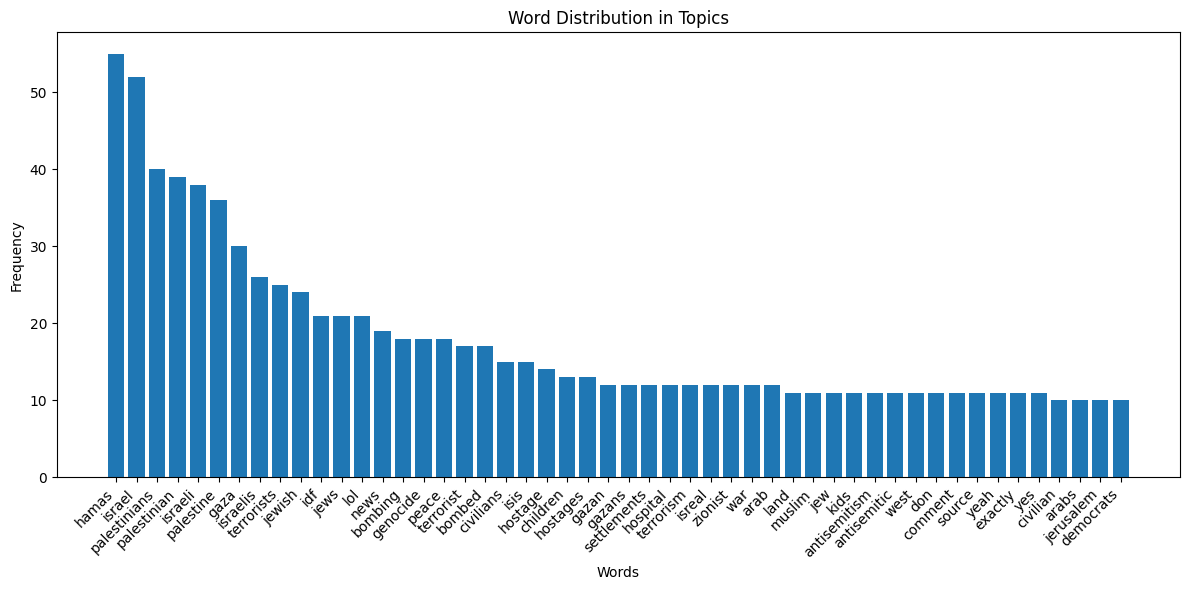

In [41]:
words = list(topics_words.keys())
counts = list(topics_words.values())

plt.figure(figsize=(12, 6))
plt.bar(words[:50], counts[:top_n])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Distribution in Topics")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

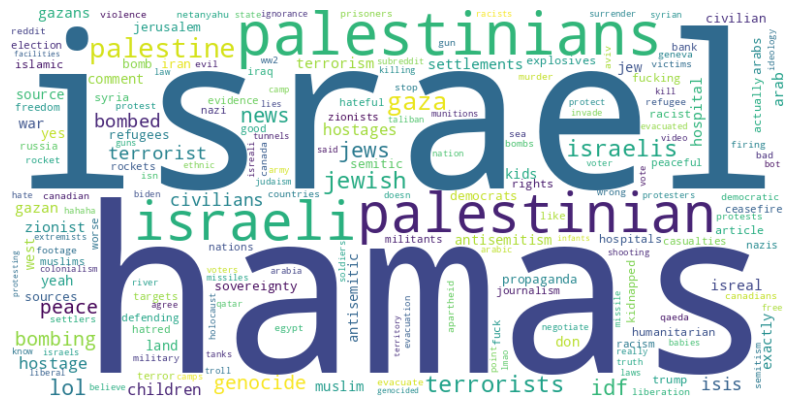

In [44]:
word_count_dict = dict(zip(words, counts))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

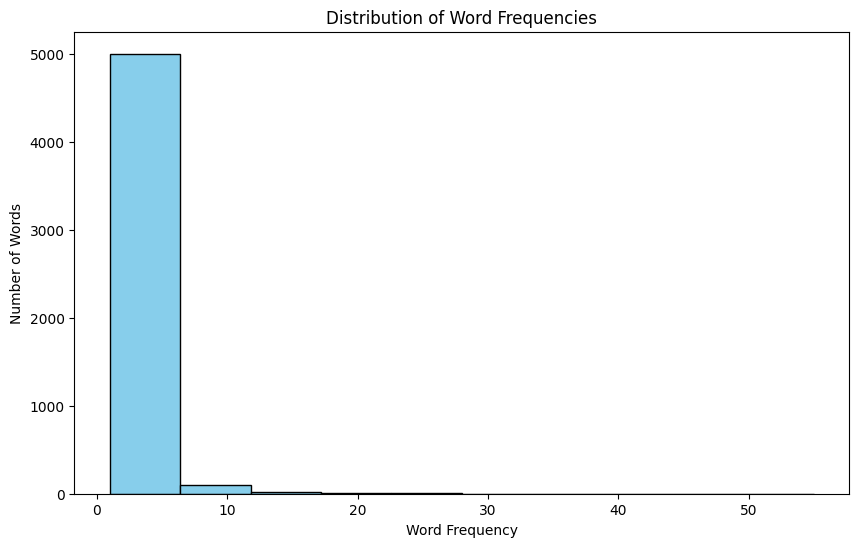

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Frequencies")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.show()

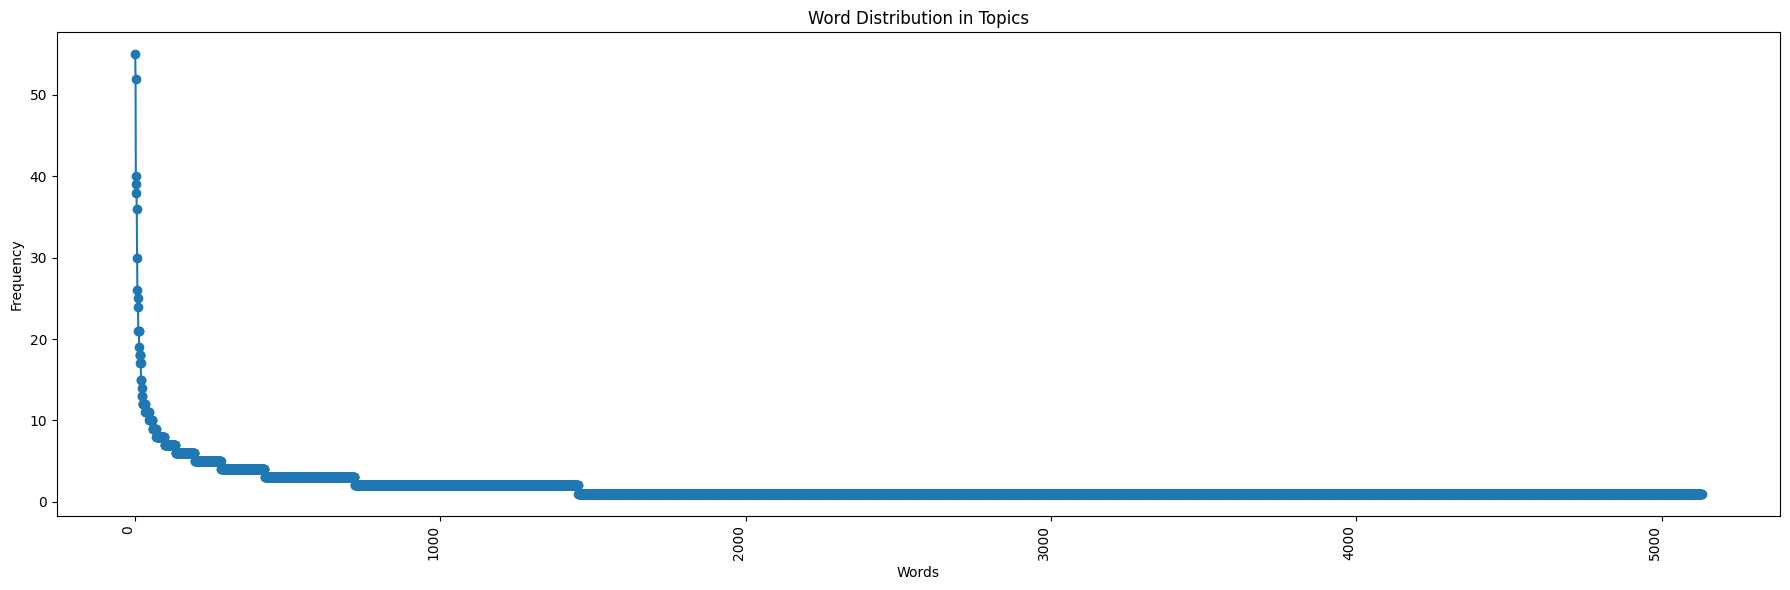

In [53]:
# each word is assigned a number for clear visualization
key_nums = list(range(1, len(topics_words) + 1))
plt.figure(figsize=(18, 6))
plt.plot(key_nums, counts[:], marker='o')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Distribution in Topics")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

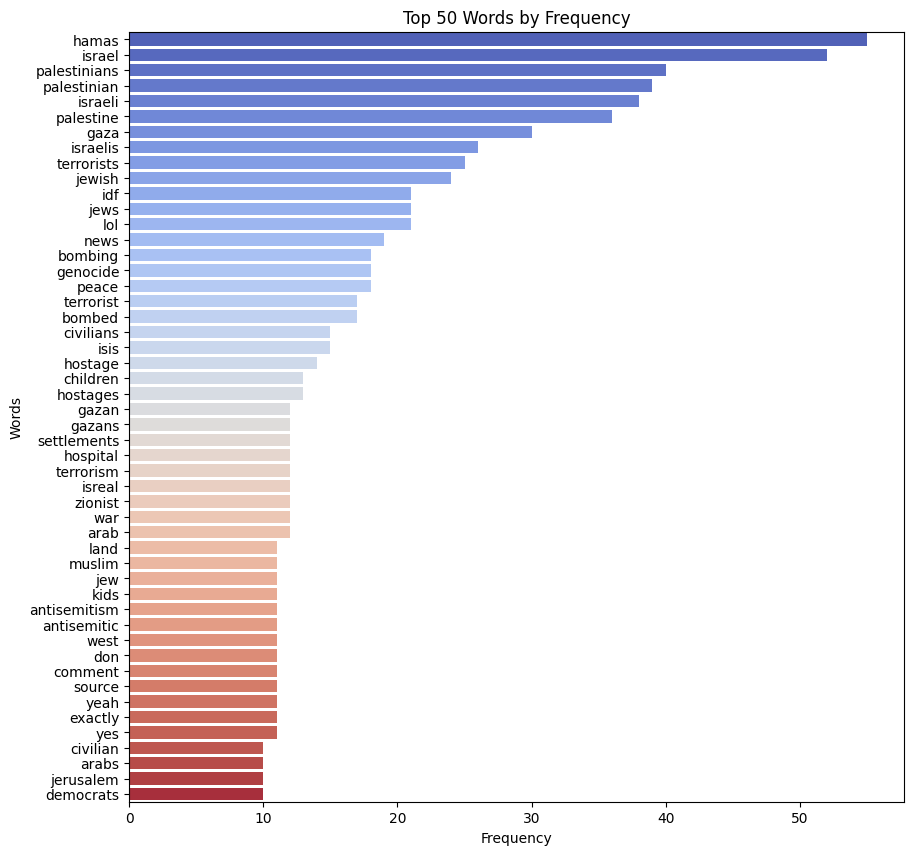

In [55]:
sorted_words_counts = sorted(zip(words, counts), key=lambda x: x[1], reverse=True)
top_words = sorted_words_counts[:top_n]
top_words, top_counts = zip(*top_words)

plt.figure(figsize=(10,10))
sns.barplot(x=top_counts, y=top_words, palette="coolwarm")
plt.title(f"Top {top_n} Words by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()